In [12]:
#required libraries
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [13]:
#reading in the image
img = cv2.imread('./test_images/dojacat.jpeg')
img.shape

(1080, 1107, 3)

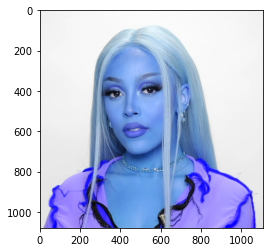

In [14]:
plt.imshow(img)

In [15]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1080, 1107)

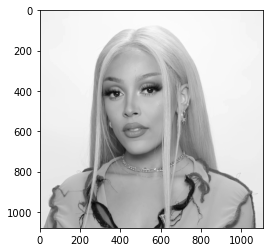

In [16]:
plt.imshow(gray, cmap='gray')

In [17]:
#cascade classifiers for detecting the coordinates and dimensions of faces and eyes
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
#faces = face_cascade.detectMultiScale(gray, 1.3, 5)
#faces
#an array of faces
#x, y, width, height

In [18]:
(x,y,w,h) = faces[0] #the "first" face
x,y,w,h

NameError: name 'faces' is not defined

In [ ]:
#this is the rectacle we will crop out later
face_img = cv2.rectangle(img, (x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

In [ ]:
cv2.destroyAllWindows()
#creates windows for eyes
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    #the cropped out face
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    #detects coordinates and dimensions of 
    #eyes of different sizes?? in the cropped out faces
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
#creates figure object
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()
#it read her nostrils as eyes...interesting

In [ ]:
plt.imshow(roi_gray, cmap='gray')

In [ ]:
#gets cropped face IF there are 2 eyes (image is viable)
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert to gray bc it's easier to detect objects
    #i believe the other 2 parameters are scaling and min neighbors
    faces = face_cascade.detectMultiScale(gray,1.3,5) #detect coordinates and dimensions of face(s)
    for(x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        #detect coordinates and dimensions of eyes
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2: #if a viable image, return the cropped face
            return roi_color

In [ ]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/dojacat.jpeg')
if cropped_image is not None: #testing a viable image
    plt.imshow(cropped_image)

In [ ]:
org_image_obstructed = cv2.imread('./test_images/headturned.jpeg')
cropped_image = get_cropped_image_if_2_eyes('./test_images/headturned.jpeg')
if cropped_image is not None: #testing an unviable image
    plt.imshow(cropped_image)


In [ ]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/headturned.jpeg')
cropped_image_no_2_eyes
#face is obstructed, should return none


In [19]:
#we need these paths in order to automatically create directories for each celebrities cropped faces
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [20]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
#get all paths in path_to_data folder (dataset folder)

In [21]:
img_dirs

['./dataset/maria_sharapova',
 './dataset/virat_kohli',
 './dataset/lionel_messi',
 './dataset/.ipynb_checkpoints',
 './dataset/serena_williams',
 './dataset/roger_federer']

In [22]:
#if cropped folder exists, remove it
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data) #create folder

In [23]:
cropped_image_dirs = [] #we'll need this list so that we can iterate through the folders
                        #to apply transformations and the like

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]  #gets celebrity name for the photo (label)
    print(celebrity_name)
        
    #for each specific image (entry) in all folders in the dataset
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path) #crops face
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name #if theres a face, create a path name with the correct celeb label
            if not os.path.exists(cropped_folder): #if there is not a folder for the celeb's cropped photo, make one
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png" #create name for celeb's cropped photo
            cropped_file_path = cropped_folder + "/" + cropped_file_name #create file path for the celeb's cropped photo
            cv2.imwrite(cropped_file_path, roi_color) #create photo in the respective celeb's cropped photo path
            count += 1
            

maria_sharapova
Generating cropped images in folder:  ./dataset/cropped/maria_sharapova
virat_kohli
Generating cropped images in folder:  ./dataset/cropped/virat_kohli
lionel_messi
Generating cropped images in folder:  ./dataset/cropped/lionel_messi
.ipynb_checkpoints
serena_williams
Generating cropped images in folder:  ./dataset/cropped/serena_williams
roger_federer
Generating cropped images in folder:  ./dataset/cropped/roger_federer


In [24]:
#create dict with each celebritie's cropped photos file paths after manually verifiying that the cropped images are of the celebrities
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'maria_sharapova': ['./dataset/cropped/maria_sharapova/maria_sharapova2.png',
  './dataset/cropped/maria_sharapova/maria_sharapova3.png',
  './dataset/cropped/maria_sharapova/maria_sharapova1.png',
  './dataset/cropped/maria_sharapova/maria_sharapova4.png',
  './dataset/cropped/maria_sharapova/maria_sharapova5.png',
  './dataset/cropped/maria_sharapova/maria_sharapova7.png',
  './dataset/cropped/maria_sharapova/maria_sharapova6.png',
  './dataset/cropped/maria_sharapova/maria_sharapova17.png',
  './dataset/cropped/maria_sharapova/maria_sharapova16.png',
  './dataset/cropped/maria_sharapova/maria_sharapova28.png',
  './dataset/cropped/maria_sharapova/maria_sharapova14.png',
  './dataset/cropped/maria_sharapova/maria_sharapova15.png',
  './dataset/cropped/maria_sharapova/maria_sharapova29.png',
  './dataset/cropped/maria_sharapova/maria_sharapova11.png',
  './dataset/cropped/maria_sharapova/maria_sharapova10.png',
  './dataset/cropped/maria_sharapova/maria_sharapova12.png',
  './dataset

In [25]:
import numpy as np
import pywt
import cv2    
#TY stack overflow
#wavelet transformations
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)

    return imArray_H

In [26]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap = 'gray')
#this wavelet transformed image is much easier for a computer to process
#signal processing
#check out Iman's youtube

NameError: name 'cropped_image' is not defined

In [27]:
#the classifier will use numbers as a celebrity name label
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'maria_sharapova': 0,
 'virat_kohli': 1,
 'lionel_messi': 2,
 'serena_williams': 3,
 'roger_federer': 4}

In [28]:
X = []
y = []

#we will vertically stack the original cropped image and the wavelet transformed image
#iterate thru dictionary
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files: #for each cropped file for each celebrity
        img = cv2.imread(training_image)
        if img is None:
            continue
        #need to scale
        scaled_raw_img = cv2.resize(img, (32,32))
        img_har = w2d(img, 'db1', 5)
        scaled_img_har = cv2.resize(img_har, (32,32))
        #stacks
        # *3 because of colorful RGB
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
        #creating training data
        X.append(combined_img)
        #creating labels
        y.append(class_dict[celebrity_name])

In [29]:
len(X)
#162 images

168

In [30]:
len(X[0])
#size of image is 32 * 32  * 3 + 32 * 32

4096

In [31]:
X[0]

array([[173],
       [174],
       [174],
       ...,
       [  0],
       [  0],
       [  0]], dtype=uint8)

In [32]:
X = np.array(X).reshape(len(X),4096).astype(float) #162 x 4096. Converting to float to avoid errors. Each image is a 1D array of 4096 datapoints
X.shape

(168, 4096)

In [33]:
X[0]

array([173., 174., 174., ...,   0.,   0.,   0.])

In [34]:
#time to train the model

In [35]:
#SVM tends to work well with classification. We'll also use GridSearchCV to practice
#testing other models and to perform hyperparameter tuning

In [36]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics  import classification_report

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0) #test size is automaticall set to 0.25

In [38]:
#we need to scale the data.
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)
#if I had more data, this would probably be better)

0.8571428571428571

In [39]:
len(X_test)

42

In [40]:
print(classification_report(y_test, pipe.predict(X_test)))
#serena williams f1 score is quite low.

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.86      1.00      0.92        12
           2       0.89      0.80      0.84        10
           3       0.67      0.80      0.73         5
           4       1.00      0.62      0.77         8

    accuracy                           0.86        42
   macro avg       0.86      0.84      0.84        42
weighted avg       0.87      0.86      0.85        42



In [41]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [42]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [43]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df.sort_values(by=['best_score'])

,model,best_score,best_params
1,random_forest,0.690769,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.832308,{'logisticregression__C': 5}
0,svm,0.841231,"{'svc__C': 1, 'svc__kernel': 'linear'}"


In [54]:
df.sort_values(by=['best_score'], ascending=False)

,model,best_score,best_params
0,svm,0.841231,"{'svc__C': 1, 'svc__kernel': 'linear'}"
2,logistic_regression,0.832308,{'logisticregression__C': 5}
1,random_forest,0.690769,{'randomforestclassifier__n_estimators': 10}


In [44]:
best_estimators


{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=5, solver='liblinear'))])}

In [45]:
best_estimators['svm'].score(X_test,y_test)


0.8571428571428571

In [46]:
best_estimators['random_forest'].score(X_test,y_test)


0.6428571428571429

In [47]:
best_estimators['logistic_regression'].score(X_test,y_test)


0.8809523809523809

In [48]:
best_clf = best_estimators['svm']


In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 7,  0,  0,  0,  0],
       [ 2, 10,  0,  0,  0],
       [ 0,  1,  8,  1,  0],
       [ 1,  0,  0,  4,  0],
       [ 1,  0,  0,  0,  7]])

Text(69.0, 0.5, 'Truth')

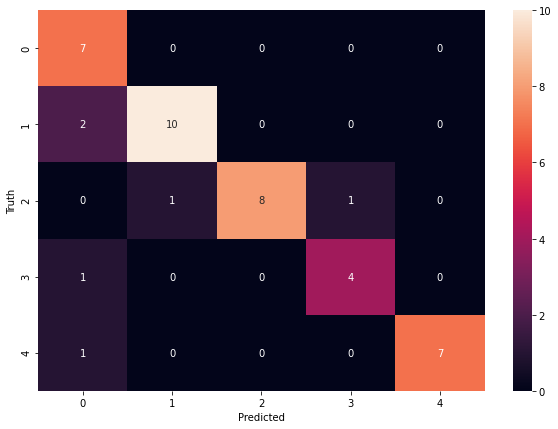

In [50]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [51]:
class_dict


{'maria_sharapova': 0,
 'virat_kohli': 1,
 'lionel_messi': 2,
 'serena_williams': 3,
 'roger_federer': 4}

In [52]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [53]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))